### Lib loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading and EDA

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x1000,January,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,26.612093,10.166667,Yes,42.941090,244.750283,Low_spent_Large_value_payments,252.924793,Standard
1,CUS_0x1000,February,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,29.439759,10.250000,Yes,42.941090,176.132567,High_spent_Small_value_payments,311.542510,Poor
2,CUS_0x1000,March,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,38.285928,10.333333,Yes,42.941090,109.056519,High_spent_Medium_value_payments,368.618557,Poor
3,CUS_0x1000,April,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,32.843081,10.416667,Yes,42.941090,87.909909,High_spent_Medium_value_payments,419.765167,Poor
4,CUS_0x1000,May,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,32.330508,10.500000,Yes,42.941090,191.834767,Low_spent_Large_value_payments,305.840309,Poor
5,CUS_0x1000,June,18,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,40.082272,10.583333,Yes,42.941090,114.802401,High_spent_Small_value_payments,372.872676,Poor
6,CUS_0x1000,July,18,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,38.149539,10.666667,Yes,42.941090,266.597160,Low_spent_Small_value_payments,251.077916,Poor
7,CUS_0x1000,August,18,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,30.077191,10.750000,Yes,42.941090,77.314276,High_spent_Medium_value_payments,400.360801,Poor
8,CUS_0x1009,January,25,Mechanic,52312.68,4250.390000,6.0,5.0,17,4.0,...,Standard,202.68,23.679534,30.416667,NM,108.366467,261.210979,Low_spent_Medium_value_payments,335.461554,Standard
9,CUS_0x1009,February,25,Mechanic,52312.68,4250.390000,6.0,5.0,17,4.0,...,Standard,202.68,28.451199,30.500000,Yes,108.366467,142.464730,High_spent_Medium_value_payments,424.207803,Standard


In [4]:
# checking for columns
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
# Checking for missing values
df.isnull().sum()

,0
Customer_ID,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0


In [6]:
# checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

### Data Preprocessing

In [7]:
# since we have a mixture of data types, let's treat them differently
numerical = [col for col in df.columns if df[col].dtype != 'object']
categorical = [col for col in df.columns if df[col].dtype == 'object']
print("Numerical columns: ", numerical)
print("Categorical columns: ", categorical)

Numerical columns:  ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
Categorical columns:  ['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [8]:
len(numerical)

17

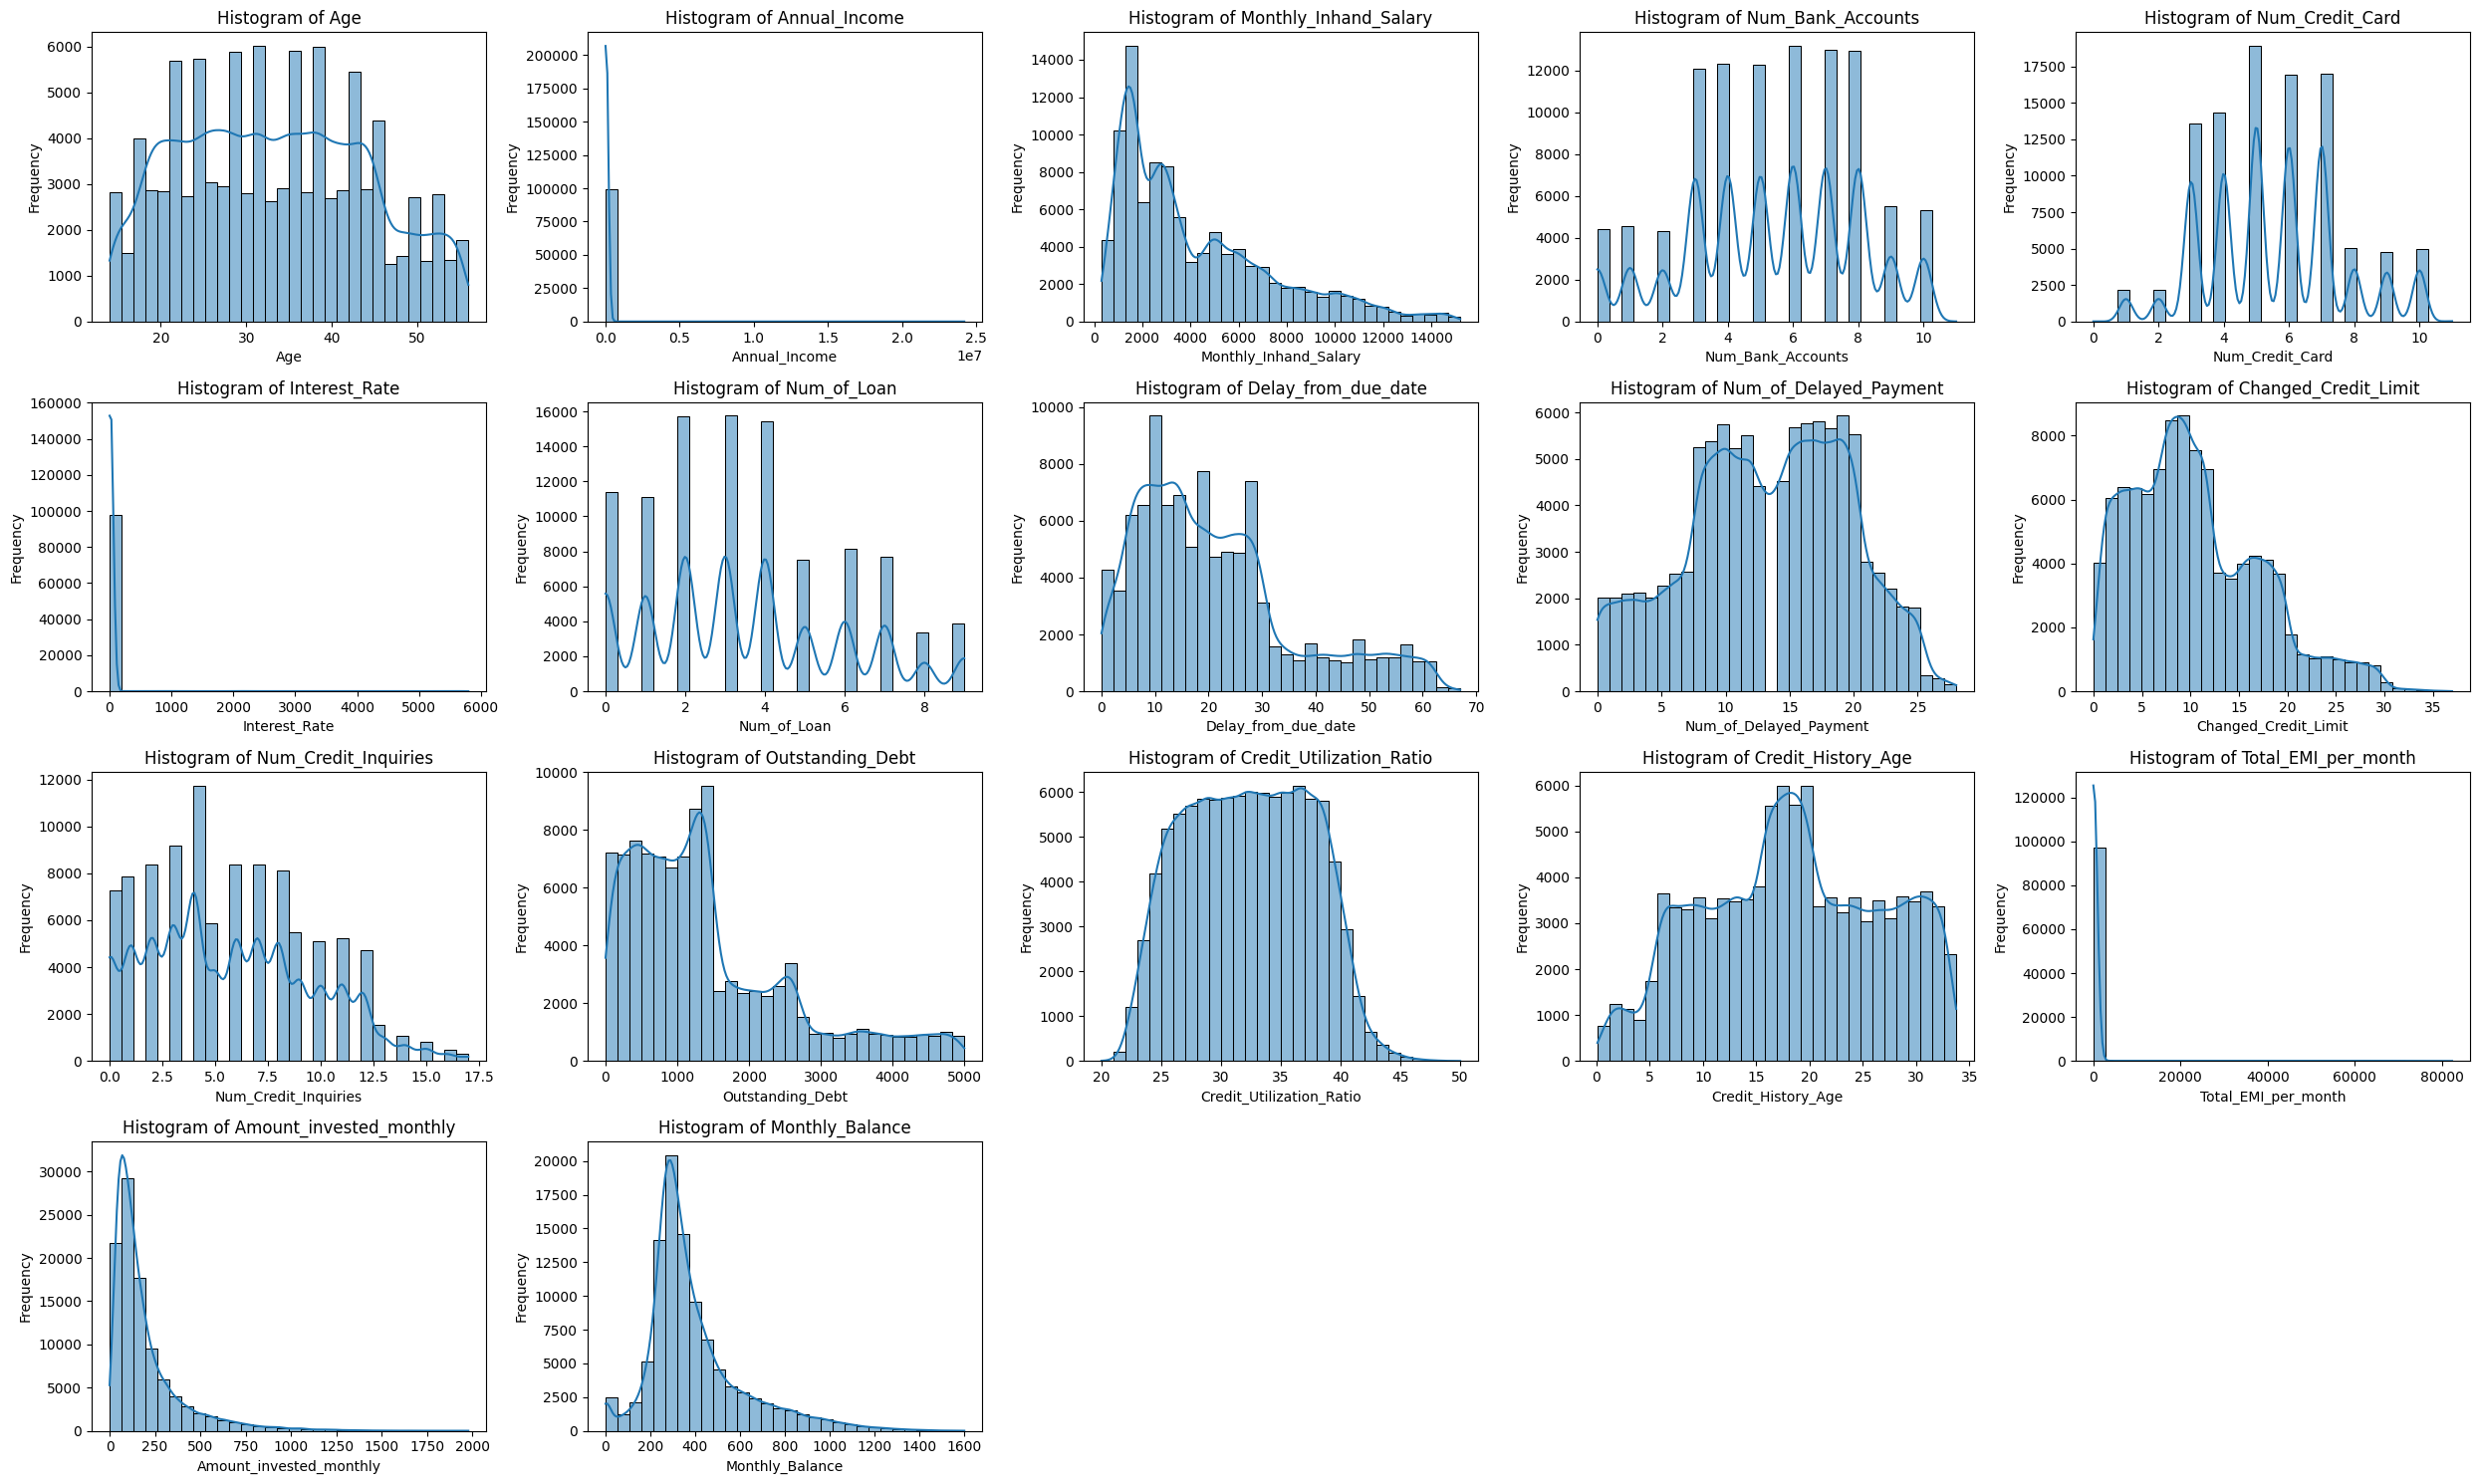

In [9]:
# some visuals

# Create histograms for numerical features
plt.figure(figsize=(25, 15))
for i, column in enumerate(numerical, 1):
    plt.subplot(4, 5, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()



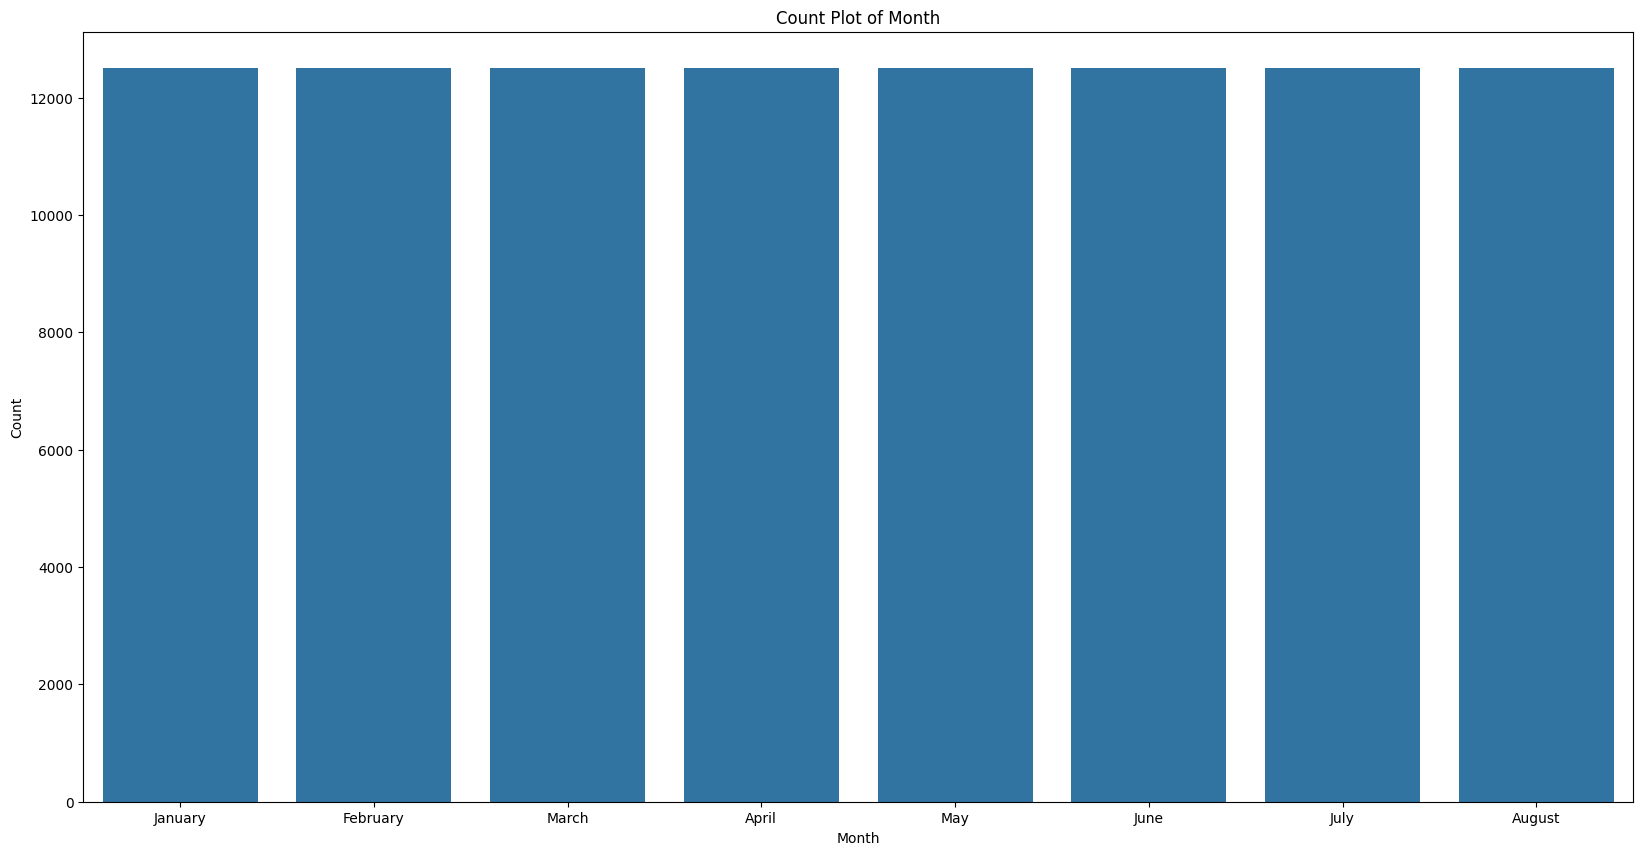

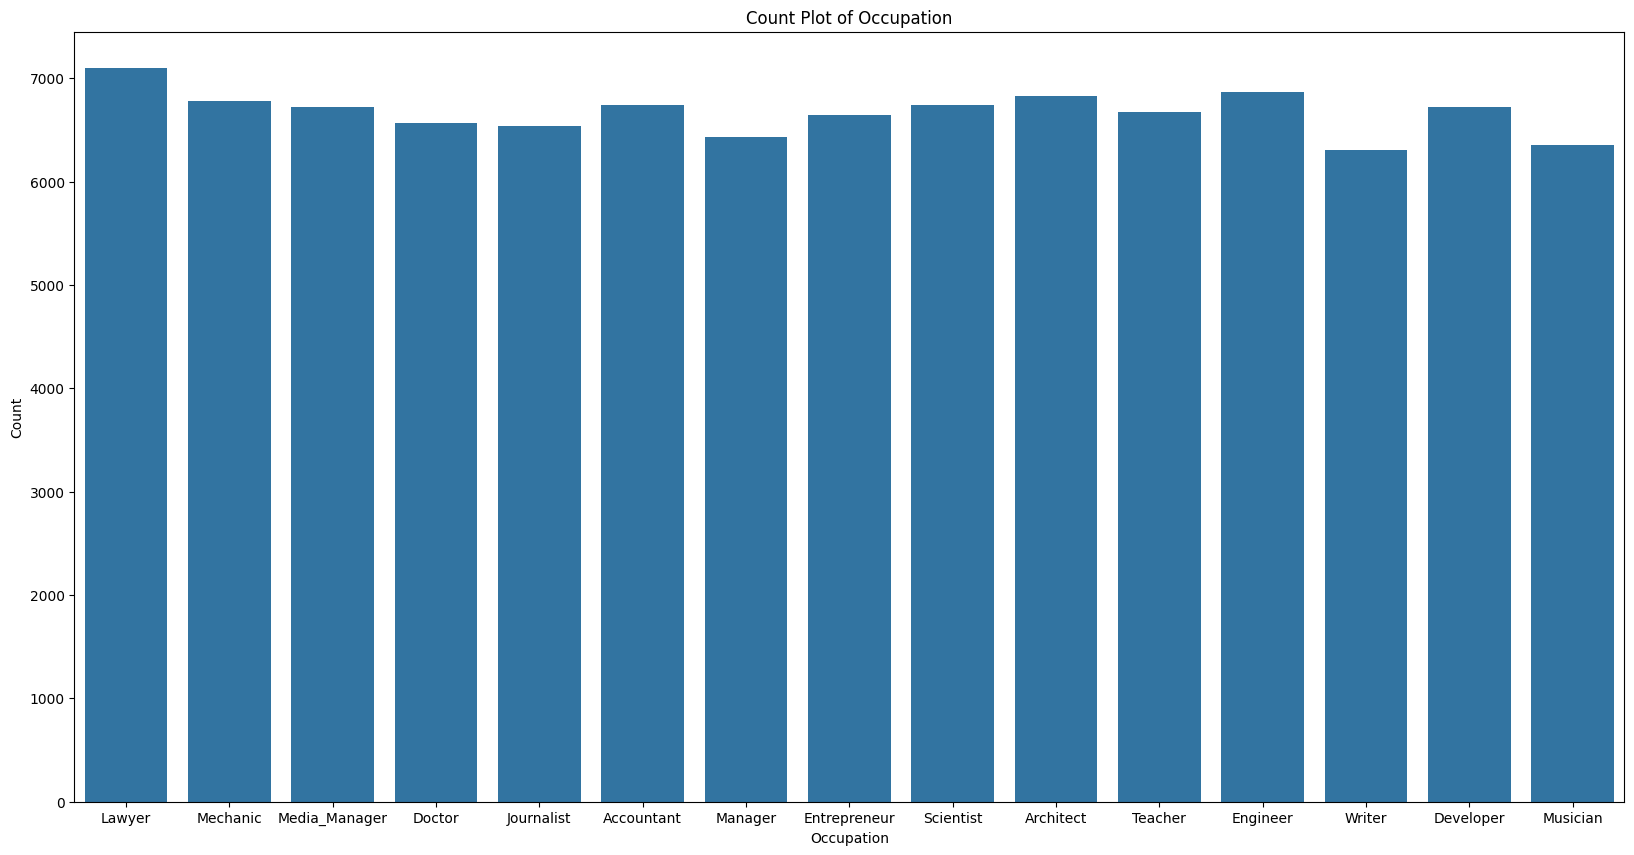

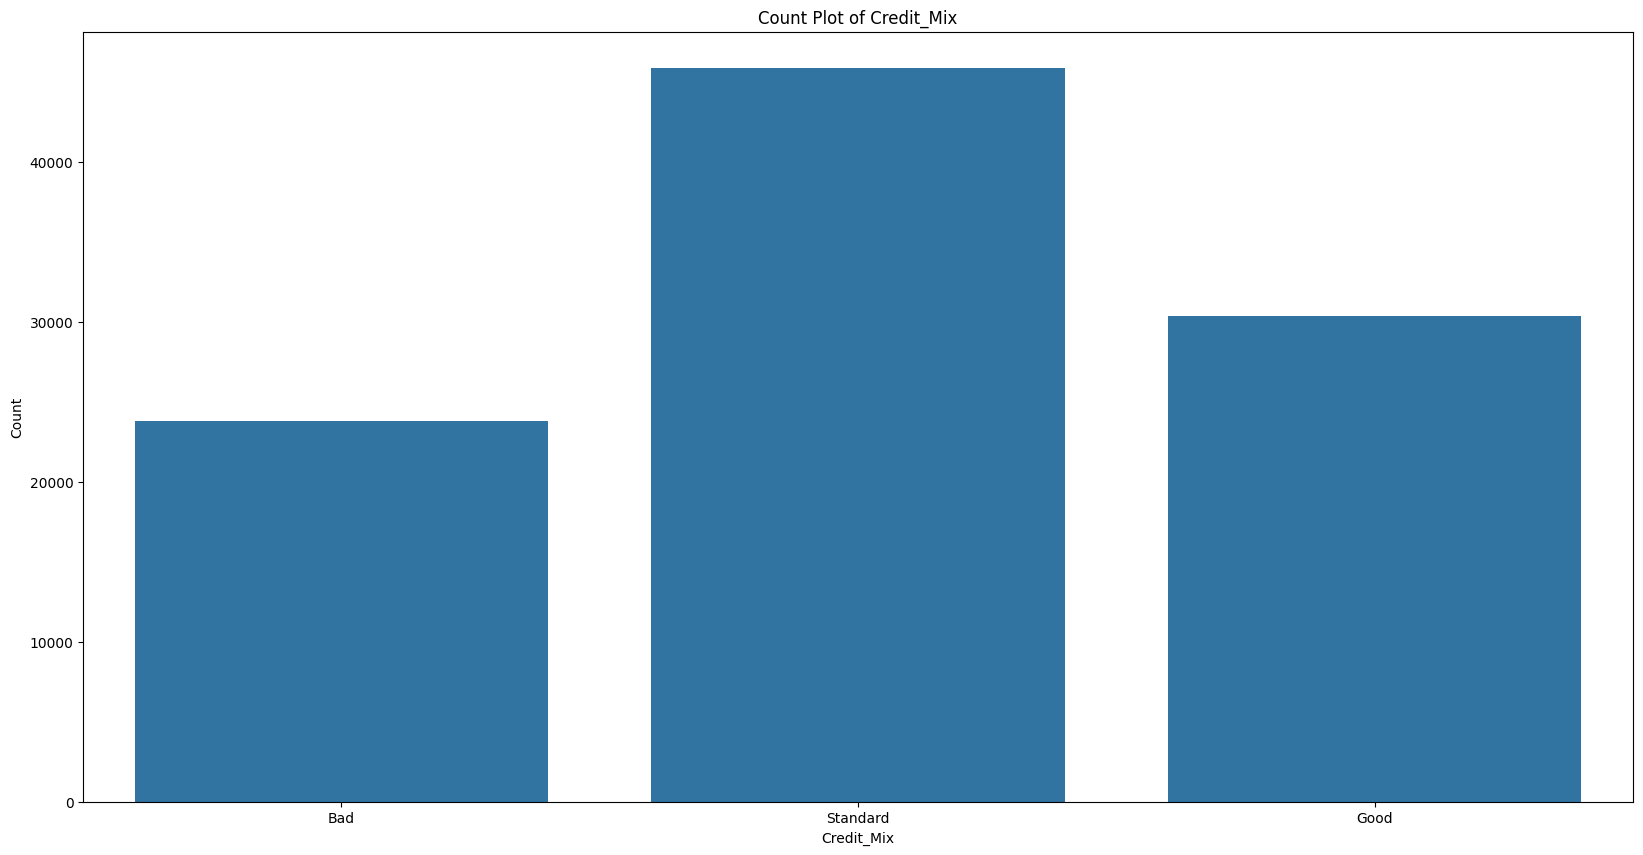

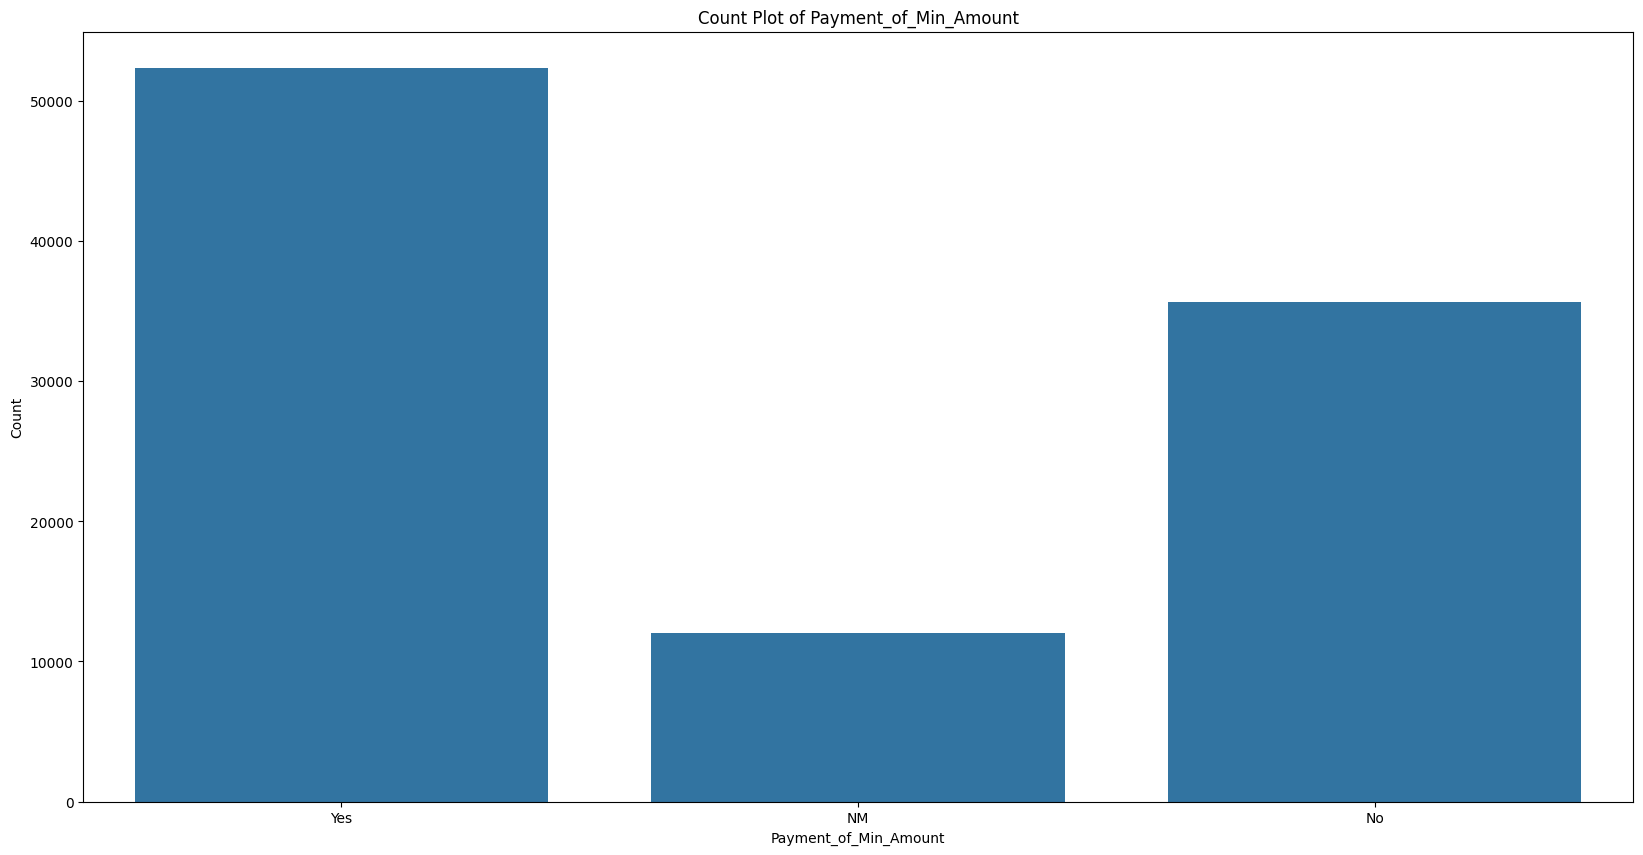

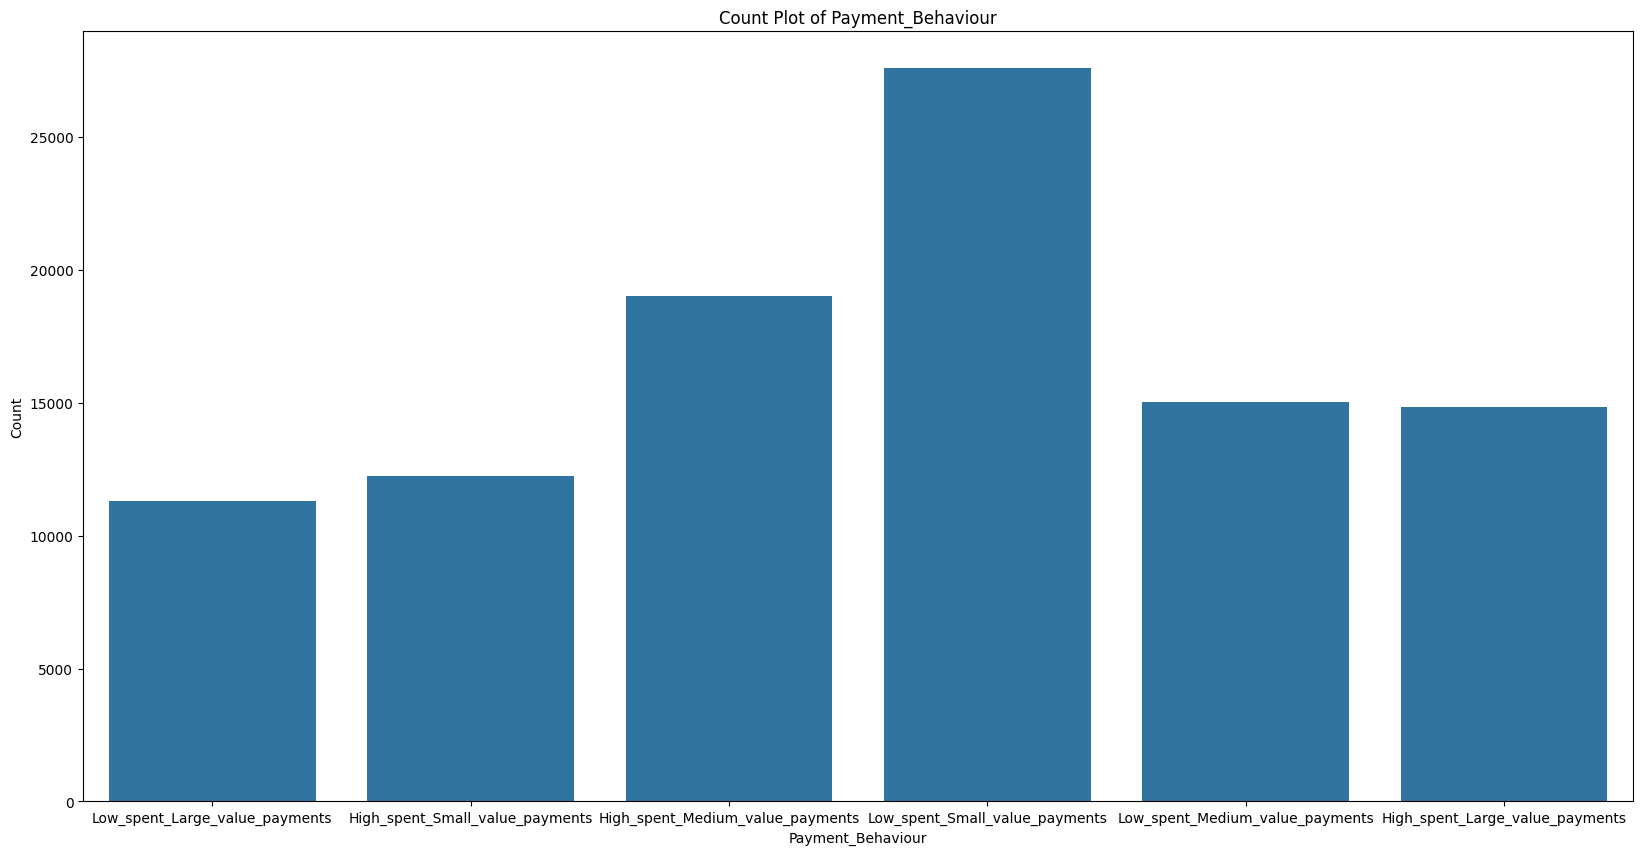

In [10]:
# Create count plots for categorical features
for column in categorical[1:-1]:
    if column != 'Type_of_Loan':
        plt.figure(figsize=(20, 10))
        sns.countplot(data=df, x=column)
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
plt.show()

In [11]:
# Preprocessing
X = df.drop(columns=['Credit_Score', 'Customer_ID'], axis=1)
y = df['Credit_Score']

# Define numerical and categorical features
numerical_features = numerical
categorical_features = categorical[1:-1]
categorical_features

['Month',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [12]:
# Define the custom order for the target variable
custom_order = ['Poor', 'Standard', 'Good']

# Convert y to a NumPy array if it's not already
y = np.array(y, dtype=str)  # Ensure y is a NumPy array of strings

# Handle missing values (replace 'nan' or np.nan with a default label or remove them)
y = np.where((y == 'nan') | (y == 'NaN') | (pd.isnull(y)), 'missing', y)

# Manually map the labels to the desired integers, including missing if necessary
if 'missing' in y:
    custom_order = custom_order + ['missing']

label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(custom_order)  # Set the classes in the desired order

# Encode the target variable
y_encoded = label_encoder.transform(y)
print(y_encoded[:50])

[1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 0 0]


In [13]:
# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [14]:
# Preprocess the data
# data splitting
X_processed = preprocessor.fit_transform(X)
X_processed

array([[-1.51503282, -0.10197863, -0.46827296, ...,  0.        ,
         2.        ,  3.        ],
       [-1.51503282, -0.10197863, -0.46827296, ...,  0.        ,
         2.        ,  2.        ],
       [-1.51503282, -0.10197863, -0.46827296, ...,  0.        ,
         2.        ,  1.        ],
       ...,
       [-0.40030314, -0.09444336, -0.14083283, ...,  2.        ,
         2.        ,  1.        ],
       [-0.307409  , -0.09444336, -0.14083283, ...,  2.        ,
         2.        ,  2.        ],
       [-0.307409  , -0.09444336, -0.14083283, ...,  2.        ,
         2.        ,  0.        ]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

### Model Training

In [25]:
# Define models
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(random_state=20)
dt = DecisionTreeClassifier(random_state=20)

In [26]:
# Define Stratified K-Fold with 5 folds
skf_5 = StratifiedKFold(n_splits=5)

In [27]:
# Train and evaluate KNN model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN ROC AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr'))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      5799
           1       0.76      0.75      0.76     10635
           2       0.65      0.59      0.62      3566

    accuracy                           0.72     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000

KNN ROC AUC Score: 0.8497632766948827


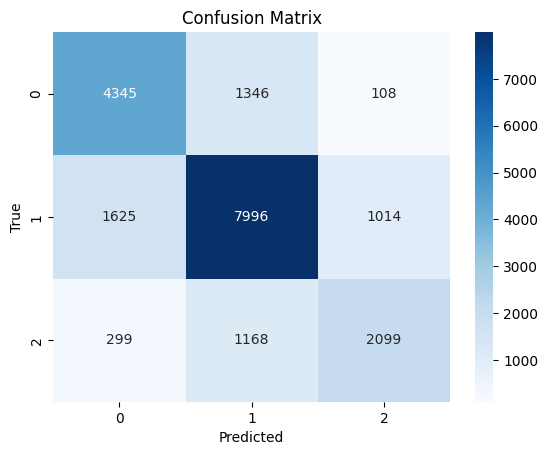

In [28]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
# Cross-validation for KNN
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=skf_5)
print("KNN Cross-Validation Accuracy Scores:", knn_cv_scores)
print("KNN Cross-Validation Mean Accuracy Score:", knn_cv_scores.mean())

KNN Cross-Validation Accuracy Scores: [0.69775   0.7019375 0.703125  0.703625  0.7068125]
KNN Cross-Validation Mean Accuracy Score: 0.7026499999999999


In [30]:
# Train and evaluate Randomforest model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Randomforest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Randomforest ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'))

Randomforest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      5799
           1       0.83      0.82      0.82     10635
           2       0.78      0.76      0.77      3566

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000

Randomforest ROC AUC Score: 0.9249824104182799


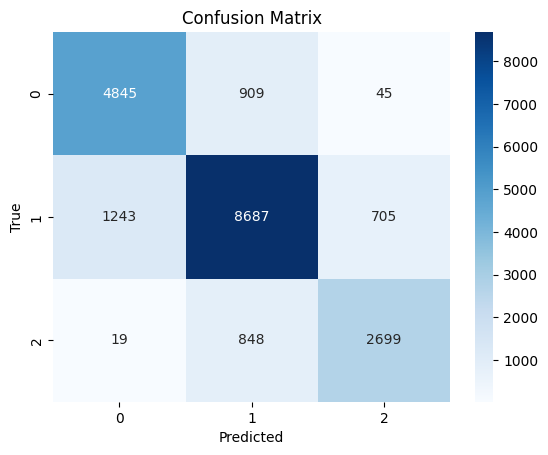

In [31]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Cross-validation for SVM
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=skf_5)
print("Randomforest Cross-Validation Accuracy Scores:", rf_cv_scores)
print("Randomforest Cross-Validation Mean Accuracy Score:", rf_cv_scores.mean())

Randomforest Cross-Validation Accuracy Scores: [0.80025  0.80225  0.80225  0.803375 0.806   ]
Randomforest Cross-Validation Mean Accuracy Score: 0.802825


In [33]:
# Train and evaluate Decision Tree model
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree ROC AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr'))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      5799
           1       0.74      0.74      0.74     10635
           2       0.66      0.66      0.66      3566

    accuracy                           0.71     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.71      0.71      0.71     20000

Decision Tree ROC AUC Score: 0.7651410957750974


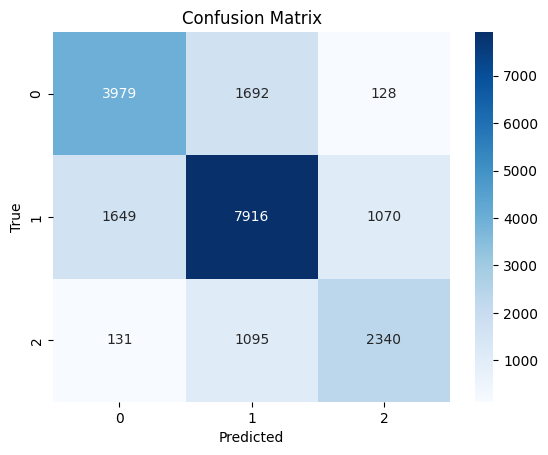

In [34]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=skf_5)
print("Decision Tree Cross-Validation Accuracy Scores:", dt_cv_scores)
print("Decision Tree Cross-Validation Mean Accuracy Score:", dt_cv_scores.mean())

Decision Tree Cross-Validation Accuracy Scores: [0.70075   0.701375  0.7058125 0.7066875 0.7053125]
Decision Tree Cross-Validation Mean Accuracy Score: 0.7039875


In [36]:
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', rf),
    ('dt', dt)
], voting='soft')

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      5799
           1       0.78      0.81      0.80     10635
           2       0.75      0.69      0.72      3566

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.78      0.78      0.77     20000

ROC AUC Score: 0.908355361211874


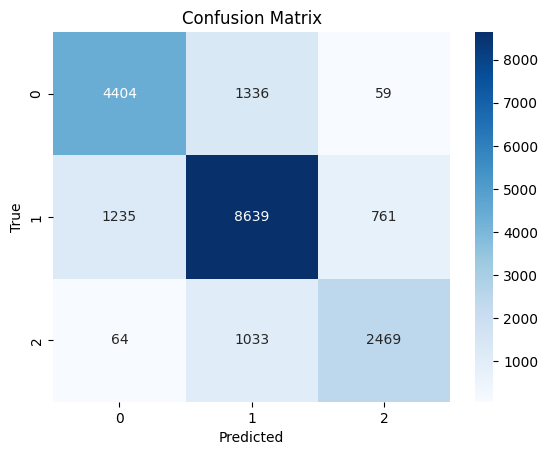

In [37]:
# Train the model
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, voting_clf.predict_proba(X_test), multi_class='ovr'))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()